In [1]:
import tensorflow as tf
import numpy as np

In [2]:
input = np.array([[255,255,255,0,0,0],[255,255,255,0,0,0],[255,255,255,0,0,0],[255,255,255,0,0,0],[255,255,255,0,0,0],[255,255,255,0,0,0]])

In [3]:
print (input)

[[255 255 255   0   0   0]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]]


In [4]:
import matplotlib.pyplot as plt


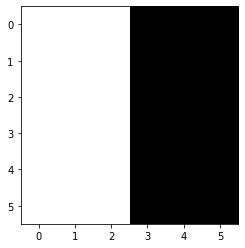

In [5]:
plt.imshow(input,cmap='gray')

In [6]:
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])


In [7]:
print (filter)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


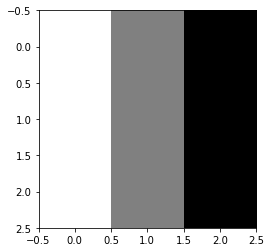

In [8]:
plt.imshow(filter,cmap='gray')

In [9]:
filter.shape

(3, 3)

In [10]:
input.shape

(6, 6)

In [11]:
# Convolving a 6x6 input with 3x3 filter (kernel) will yield a 4x4 output

output_array = np.zeros((4,4))



In [12]:
# Perform the covolution operation using loops

for i in range(input.shape[0]-2):
    for j in range(input.shape[1]-2):
        temp_array = input[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*filter)

        

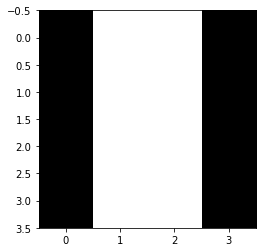

In [13]:
plt.imshow(output_array, cmap='gray')

In [14]:
def replicate_padding(arr):
    """Perform replicate padding on a numpy array."""
    new_pad_shape = tuple(np.array(arr.shape) + 2) # 2 indicates the width + height to change, a (512, 512) image --> (514, 514) padded image.
    padded_array = np.zeros(new_pad_shape) #create an array of zeros with new dimensions
    
    # perform replication
    padded_array[1:-1,1:-1] = arr        # result will be zero-pad
    padded_array[0,1:-1] = arr[0]        # perform edge pad for top row
    padded_array[-1, 1:-1] = arr[-1]     # edge pad for bottom row
    padded_array.T[0, 1:-1] = arr.T[0]   # edge pad for first column
    padded_array.T[-1, 1:-1] = arr.T[-1] # edge pad for last column
    
    #at this point, all values except for the 4 corners should have been replicated
    padded_array[0][0] = arr[0][0]     # top left corner
    padded_array[-1][0] = arr[-1][0]   # bottom left corner
    padded_array[0][-1] = arr[0][-1]   # top right corner 
    padded_array[-1][-1] = arr[-1][-1] # bottom right corner
    print(padded_array)
    return padded_array

a = replicate_padding(input)

[[255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]
 [255. 255. 255. 255.   0.   0.   0.   0.]]


The edge here appears thick because we using a trivial image of 6 x 6. 
If you applied the convolution to a larger resolution image the edge would appear of regular width.

# DIY: Write a generic function thats 2 inputs: input image, filter and returns an output array which is a convolution of input and filter . Assume image is of resolution nxn greyscale and filter is of dimension fxf




In [18]:
def convolution(input, filter):
  f = filter.shape[0]
  n_input = input.shape[0] 
  n_output = n_input -  f + 1 
  print (n_input,f, n_output)
  output = np.zeros((n_output,n_output))
  for i in range(n_output):
    for j in range(n_output):
        temp_array = input[i:i+f, j:j+f]
        output[i, j] = np.sum(temp_array*filter)
  return(output)


In [19]:
print (convolution(input,filter))

6 3 4
[[  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]]


In [16]:
print (convolution(input,filter))

6 3 4
[[  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]]


# DIY - Convolution Operation using Tensorflow

Hints:

1) Read documentation for tf.nn.conv2d

2) tf.nn.conv2d takes 4D tensors as input. Therefore reshape your input and 
filter arrays

3) After reshaping, turn the arrays into tensor objects using tf.constant

4) Use tf.nn.conv2d to perform the covoluvtion operation. Note: In addition to passing input and filter tensors  you will also have to set strides and padding parameters

5) print the output. Try removing the unwanted dimensions using tf.squeeze



In [ ]:
input

array([[255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0]])

In [ ]:
filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [ ]:
# reshape input and filter because tf.nn.conv2d uses 4D tensors

input_reshaped = input.reshape((1,6,6,1))

filter_reshaped = filter.reshape((3,3,1,1))

In [ ]:
# Turn the reshapped arrays into tensor objects

input_tf = tf.constant(input_reshaped,dtype=tf.float32)

filter_tf = tf.constant(filter_reshaped,dtype = tf.float32)


In [ ]:
# Perform the covolution operationn

convolved_output = tf.nn.conv2d(input_tf, filter_tf, strides=1, padding="VALID")




In [ ]:
print (convolved_output)

tf.Tensor(
[[[[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]]], shape=(1, 4, 4, 1), dtype=float32)


In [ ]:
# The output above is difficult to read. Use tf.squeeze to remove dimensions that are 1

print (tf.squeeze(convolved_output))

tf.Tensor(
[[  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]], shape=(4, 4), dtype=float32)


# Scratchpad Code


In [ ]:
input = input.reshape((1,6,6,1))

In [ ]:
input

array([[[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]]])

In [ ]:
filter = filter.reshape((3,3,1))

In [ ]:
filter

array([[[ 1],
        [ 0],
        [-1]],

       [[ 1],
        [ 0],
        [-1]],

       [[ 1],
        [ 0],
        [-1]]])

In [ ]:
input = tf.convert_to_tensor(input,dtype=tf.float64)

ValueError: ignored

In [ ]:
filter = tf.convert_to_tensor(filter,dtype=tf.float32)

In [ ]:
input

<tf.Tensor: shape=(6, 6, 1), dtype=int64, numpy=
array([[[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]],

       [[30],
        [30],
        [30],
        [ 0],
        [ 0],
        [ 0]]])>

In [ ]:
A = np.array([[30.0,30.0,30.0,0,0,0],[30,30,30,0,0,0],[30,30,30,0,0,0],[30,30,30,0,0,0],[30,30,30,0,0,0],[30,30,30,0,0,0]])
B = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])



In [ ]:
tfA = tf.constant(A, dtype=tf.float32)

tfA = tfA[tf.newaxis, :, :, tf.newaxis]


In [ ]:
tfK = tf.constant(B, dtype=tf.float32)
tfK = tfK[:, :, tf.newaxis, tf.newaxis]

In [ ]:
convolved = tf.nn.conv2d(tfA, tfK, strides=1, padding="VALID")


In [ ]:
convolved.numpy()

array([[[[ 0.],
         [90.],
         [90.],
         [ 0.]],

        [[ 0.],
         [90.],
         [90.],
         [ 0.]],

        [[ 0.],
         [90.],
         [90.],
         [ 0.]],

        [[ 0.],
         [90.],
         [90.],
         [ 0.]]]], dtype=float32)

In [ ]:
#padded_array = np.pad(lion_arr, (1, 1), 'constant')
#kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output_array = np.zeros((4,4))

for i in range(input.shape[0]-2):
    for j in range(input.shape[1]-2):
        temp_array = input[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*filter)

In [ ]:
input.shape

(6, 6)

In [ ]:
filter.shape

(3, 3)

In [ ]:
print (output_array)

[[  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]
 [  0. 765. 765.   0.]]


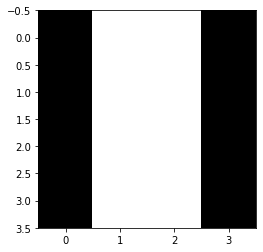

In [ ]:
plt.imshow(output_array,cmap='gray')

In [ ]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])



In [ ]:
x_in.shape

(1, 5, 5, 1)

In [ ]:
input.shape

(6, 6)

In [ ]:
input_reshaped = input.reshape((1,6,6,1))

In [ ]:
input_reshaped.shape

(1, 6, 6, 1)

In [ ]:
x_in

array([[[[2],
         [1],
         [2],
         [0],
         [1]],

        [[1],
         [3],
         [2],
         [2],
         [3]],

        [[1],
         [1],
         [3],
         [3],
         [0]],

        [[2],
         [2],
         [0],
         [1],
         [1]],

        [[0],
         [0],
         [3],
         [1],
         [2]]]])

In [ ]:
input_reshaped

array([[[[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]],

        [[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]],

        [[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]],

        [[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]],

        [[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]],

        [[255],
         [255],
         [255],
         [  0],
         [  0],
         [  0]]]])

array([[255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0]])

In [ ]:
filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [ ]:
filter_reshaped = filter.reshape((3,3,1,1))

In [ ]:
input_tf = tf.constant(input_reshaped,dtype=tf.float32)

filter_tf = tf.constant(filter_reshaped,dtype = tf.float32)

In [ ]:
convolved1 = tf.nn.conv2d(input_tf, filter_tf, strides=1, padding="VALID")


In [ ]:
print (convolved1)

tf.Tensor(
[[[[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]

  [[  0.]
   [765.]
   [765.]
   [  0.]]]], shape=(1, 4, 4, 1), dtype=float32)
